# Monotoniforhold

In [173]:
import numpy as np
import plotly.express as px
from sympy import *
import pandas as pd

In [197]:
x = Symbol('x')
f = Function('f', real=True)
df = Function('df', real=True)

### Funktion

In [198]:
f = x**3 - x**2 - 2*x
f

x**3 - x**2 - 2*x

### Den afledede til funktionen

In [199]:
df = f.diff(x)
df

3*x**2 - 2*x - 2

Nulpunkter for den afledede funktion

In [200]:
zeros = solveset(df, x, Interval(-2, 4))
zeros

FiniteSet(1/3 - sqrt(7)/3, 1/3 + sqrt(7)/3)

In [201]:
N(zeros)

FiniteSet(-0.548583770354863, 1.21525043702153)

In [202]:
zeros = list(zeros)
lam_f = lambdify(x, f)
lam_df = lambdify(x, df)

In [203]:
x = np.linspace(-2, 4, 100)

In [213]:
dataframe = pd.DataFrame(data={'x': x, 'f': lam_f(x), 'df': lam_df(x)})

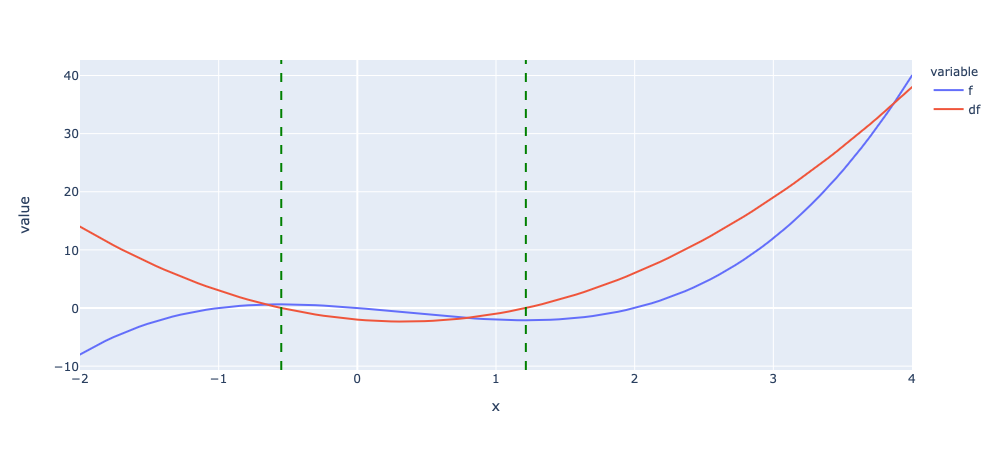

In [214]:
fig = px.line(dataframe, x='x', y=['f', 'df'])
fig.add_vline(x=float(zeros[0]), line_width=2, line_dash="dash", line_color="green")
fig.add_vline(x=float(zeros[1]), line_width=2, line_dash="dash", line_color="green")
fig.show()